# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5149250000000,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1a. Get the total rides for each city type
# Create the city DataFrame, by type.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1076080000000,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1985260000000,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4421840000000,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3269650000000,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4018030000000,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2781340000000,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4256850000000,4,Rural


In [4]:
#1b get total rides for each city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# get total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [5]:
# 2. Get the total drivers for each city type NOT CALCULATING DRIVERS PROPERLY
urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]

total_drivers = pyber_data_df.drop_duplicates(["city"]).groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
urban_fares = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fares = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_fares = rural_cities_df.groupby(["city"]).sum()["fare"]

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_urban_fare = total_fares["Urban"] / total_rides["Urban"]
avg_suburban_fare = total_fares["Suburban"] / total_rides["Suburban"]
avg_rural_fare = total_fares["Rural"] / total_rides["Rural"]

avg_fare_ride = total_fares / total_rides
avg_fare_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. THIS IS WRONG - SUMMING ALL THE DRIVERS IN A CITY NOT JUST GRABBING IT.
avg_urban_driver_fare = total_fares["Urban"] / total_drivers["Urban"]
avg_suburban_driver_fare = total_fares["Suburban"] / total_drivers["Suburban"]
avg_rural_driver_fare = total_fares["Rural"] / total_drivers["Rural"]

avg_driver_fare = total_fares / total_drivers
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
              "Total Rides": total_rides,
              "Total Drivers": total_drivers,
              "Total Fares": total_fares,
              "Average Fare per Ride": avg_fare_ride,
              "Average Fare per Driver": avg_driver_fare})

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fares_by_date


type   date            
Rural  2019-01-01 9:45     43.69
       2019-01-02 11:18    52.12
       2019-01-03 19:51    19.90
       2019-01-04 3:31     24.88
       2019-01-06 7:38     47.33
                           ...  
Urban  2019-05-08 1:54     32.69
       2019-05-08 2:31     41.33
       2019-05-08 4:20     21.99
       2019-05-08 4:39     18.45
       2019-05-08 7:29     18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date = fares_by_date.reset_index()


In [14]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date.pivot(index = "date", columns = "type", values =["fare"])



fare                
type             Rural Suburban  Urban
date                                  
2019-01-01 0:08    NaN      NaN  37.91
2019-01-01 0:46    NaN    47.74    NaN
2019-01-01 12:32   NaN    25.56    NaN
2019-01-01 14:40   NaN      NaN   5.42
2019-01-01 14:42   NaN      NaN  12.31
...                ...      ...    ...
2019-05-08 1:54    NaN      NaN  32.69
2019-05-08 2:31    NaN      NaN  41.33
2019-05-08 4:20    NaN      NaN  21.99
2019-05-08 4:39    NaN      NaN  18.45
2019-05-08 7:29    NaN      NaN  18.55

[2361 rows x 3 columns]

In [15]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'. 
# ? - website says 2019-01-01 through 2019-04-29
year_2019_df = pd.DataFrame(fares_by_date.loc[(fares_by_date["date"] > "2019-01-01") & (fares_by_date["date"] <= "2019-04-29")])
year_2019_df = year_2019_df.pivot(index = "date", columns = "type", values =["fare"])


In [16]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
year_2019_df.index = pd.to_datetime(year_2019_df.index)
year_2019_df

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 12:32:00   NaN    25.56    NaN
2019-01-01 14:40:00   NaN      NaN   5.42
2019-01-01 14:42:00   NaN      NaN  12.31
...                   ...      ...    ...
2019-04-28 04:34:00   NaN      NaN  40.46
2019-04-28 08:15:00   NaN      NaN  22.86
2019-04-28 09:03:00   NaN      NaN  15.00
2019-04-28 09:10:00   NaN      NaN   5.73
2019-04-28 09:25:00   NaN      NaN  37.35

[2182 rows x 3 columns]

In [17]:
# 14. Check that the datatype for the index is datetime using df.info()
year_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  570 non-null    float64
 2   (fare, Urban)     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [18]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_total_fares = year_2019_df.resample("W").sum()
weekly_total_fares

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

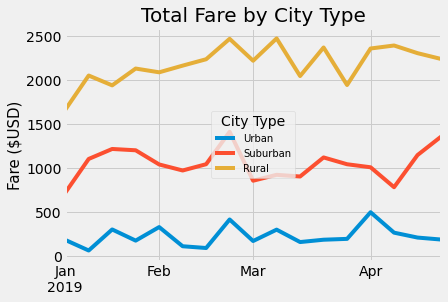

In [27]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_total_fares.plot()
plt.xlabel("")
plt.ylabel("Fare ($USD)", fontsize=15)
plt.title("Total Fare by City Type", fontsize=20)
plt.grid(True)
plt.legend(['Urban', 'Suburban', 'Rural'], title="City Type", loc="center", fontsize=10)


# Save the figure.
plt.savefig("Analysis/PyBer_fare_summary.png")

